<div style="border:solid green 2px; padding: 20px">

<b>Привет, Диана!</b>

Меня зовут Ярослав П. и я буду проверять твой проект. Попробую помочь сделать тебе его еще лучше!

Предлагаю общаться на «**ты**». Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на «**вы**».

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания или советы.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    
    
### <span style="color:orange">Обратная связь</span><a class="tocSkip">

- Проект выполнен на высоком уровне.
- Это только начало моделирования, но ты уже делаешь успехи.
- Хорошо реализован подбор гиперпараметров и тестирование моделей.
- Один момент - проверка на мультиколлинеарность. Оставил комментарий. Также выбивает ошибку в одном месте.
    
### <span style="color:orange">Обратная связь (v2)</span><a class="tocSkip">

- Проект практически готов! Оставил новый комментарий про мультиколлинеарность признаков и привел код с двойным циклом, посмотри, пожалуйста.
    
### <span style="color:orange">Обратная связь (v3)</span><a class="tocSkip">

- Проект отлично доработан, спасибо за уделенное время!
    
Проект принят, успехов в дальнейшем обучении!

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

# Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
* сalls — количество звонков,
* minutes — суммарная длительность звонков в минутах,
* messages — количество sms-сообщений,
* mb_used — израсходованный интернет-трафик в Мб,
* is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Отличное введение.

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Также в начале полезно дать описание данных, с которыми предстоит работа и содержание/шаги проекта.

</div>

## Откройте и изучите файл

Для начала импортируем все библиотеки, которые могут понадобиться в течение выполнения проекта.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Я заметил, что нумерация блоков с кодом была не с 1. Советую перед финальной отправкой проекта делать Kernel - Restart and Run All, это позволит проверить тетрадь на работоспособность и избежать лишних ошибок.

</div>

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


В переменной df получаем таблицу, в которой собраны данные, описанные в задании.   
На данном шаге уже можно понять, что за target мы возьмем столбец is_ultra, за features - все оставшиеся признаки.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Хороший первый взгляд на данные. 

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Также в начале полезно провести небольшой анализ данных. Нет ли каких-либо аномальных значений, как распределен целевой признак.

</div>


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

<s>Также прошу оценить мультиколлинеарность признаков (когда признаки модели имеют сильную связь друг с другом). Стоит найти коффиценты корреляции, построить график скатерплот. После этого нужно принять решение о включении в модель одного из признаков. В общем случае такие признаки лишь мешают друг другу и утяжеляют модель.  Здесь стоит экспериментировать (эксперименты - основа нашего дела 😉). Если же модели дают одинаковые результаты что с двумя признаками (calls и minutes), что с одним из них, то тогда точно стоит один из них дропнуть. Меньше признаков - легче модель, быстрее обучается, быстрее предсказывает, что всегда хорошо.

</div>


Pearson coeficient:  0.206954638121695


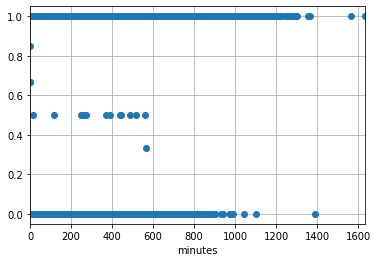

In [3]:
df.groupby('minutes')['is_ultra'].mean().plot(x = 'minutes', y = 'is_ultra', style = 'o', grid = True)
print('Pearson coeficient: ',df['is_ultra'].corr(df['minutes']))

Pearson coeficient:  0.2071215589860754


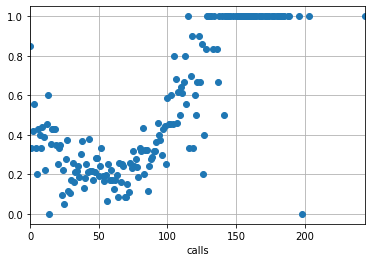

In [4]:
df.groupby('calls')['is_ultra'].mean().plot(x = 'calls', y = 'is_ultra', style = 'o', grid = True)
print('Pearson coeficient: ',df['is_ultra'].corr(df['calls']))

Pearson coeficient:  0.20382983853553618


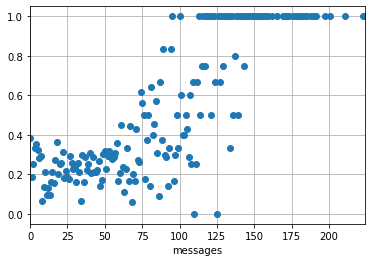

In [5]:
df.groupby('messages')['is_ultra'].mean().plot(x = 'messages', y = 'is_ultra', style = 'o', grid = True)
print('Pearson coeficient: ',df['is_ultra'].corr(df['messages']))

Pearson coeficient:  0.1985676456197424


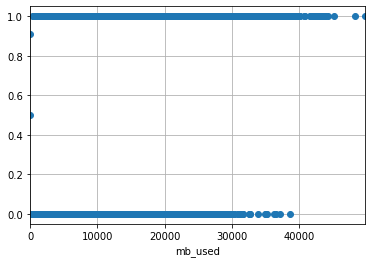

In [6]:
df.groupby('mb_used')['is_ultra'].mean().plot(x = 'mb_used', y = 'is_ultra', style = 'o', grid = True)
print('Pearson coeficient: ',df['is_ultra'].corr(df['mb_used']))

Просмотрев коэффициенты Пирсона для каждого из признаков, можно сказать, что корреляция у признака mb_used, меньше чем у остальных, но при исключении этого признака из выборки значение accuracy снизилось для всей выборки.

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

<s>Обрати внимание, что находить корреляцию Пирсона между категориальной величиной (наш таргет) и количественными величинами (все остальные) не совсем корректно, так как она предназначен для кол. переменных. Я имел ввиду оценить связь именно признаков между собой - попробуй такой метод:
    
>`df.corr()`

</div>


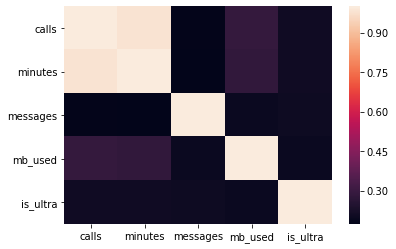

In [7]:
df.corr()
sns.heatmap(df.corr())

Посмотрев зависимость между признаками, очень хорошо видно, что самая большая зависимость между показателями calls и minutes. Можно попробовать убрать именно один из этих параметров. После исключения признака minutes показатели accuracy по всем моделям выросли.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v3)</b>

Молодец, что провела эксперименты!

</div>


In [8]:
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

Аномальных значений в графе принадлежности к тарифу нет.

## Разбейте данные на выборки

In [9]:
df_train, df_valid = train_test_split(df, test_size=0.4, random_state=12345)
df_valid, df_test =  train_test_split(df_valid, test_size=0.5, random_state=12345)

print('Size of trainig sample:', df_train.shape[0])
print('Size of validation sample:', df_valid.shape[0])
print('Size of test sample:', df_test.shape[0])

Size of trainig sample: 1928
Size of validation sample: 643
Size of test sample: 643


Разбиваем данные на три выборки: тренировочная (для обучения модели), валидационная и тестовая. Примерно в отношении 3:1:1.

In [10]:
features_train = df_train.drop(['is_ultra', 'minutes'], axis = 1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop(['is_ultra', 'minutes'], axis = 1)
target_valid = df_valid['is_ultra']

features_test = df_test.drop(['is_ultra', 'minutes'], axis = 1)
target_test = df_test['is_ultra']

Каждую выборку еще разбиваем на целевую и признаки.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Хорошо, данные разделены. Молодец, что проконтролировала размеры выборок.

</div>


## Исследуйте модели

In [11]:
max_depth = 0
best_acc_des_tree = 0
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)  
    result = accuracy_score(target_valid, predictions_valid)
    if result > best_acc_des_tree:
        best_acc_des_tree = result
        max_depth = depth
print("for the model DecisionTreeClassifier")
print("Max_depth = ", max_depth)
print("Best accuracy = ", best_acc_des_tree)

for the model DecisionTreeClassifier
Max_depth =  5
Best accuracy =  0.7900466562986003


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

<s>Тут выбивает ошибку :( Проверь, пожалуйста, в чем дело.

</div>


Исправила ошибку, не везде заменила название переменной

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

👍

</div>


Исследуем модель решающего дерева.

In [13]:
best_est = 0
best_result_rand_tree = 0
for est in range(1, 50):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # обучите модель с заданным количеством деревьев
    model.fit(features_train, target_train) # обучите модель на тренировочной выборке
    result = model.score(features_valid, target_valid) # посчитайте качество модели на валидационной выборке
    if result > best_result_rand_tree:        
        best_est = est
        best_result_rand_tree = result
print("Для лучшей модели RandomForestClassifier")
print("Best estimators = ", best_est)
print("Best accuracy = ", best_result_rand_tree)

Для лучшей модели RandomForestClassifier
Best estimators =  40
Best accuracy =  0.7900466562986003


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Также стоило настроить глубину дерева для случайного леса, то есть пройтись двойным циклом.

</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> 
    К сожалению не очень понимаю, как это сделать, было бы очень здорово, если бы ты подсказал, как именно надо сделать(возможно именно с фрагментом кода)  
заранее спасибо!!</div>


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера (v2)</b>

Без проблем :)

</div>


In [12]:
best_est = 0
best_depth = 0
best_result_rand_tree = 0
for est in range(10, 101, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train) 
        result = model.score(features_valid, target_valid) 
        if result > best_result_rand_tree:        
            best_est = est
            best_depth = depth
            best_result_rand_tree = result
print("for the best model of RandomForestClassifier")
print("Best estimators = ", best_est)
print("Best depth = ", best_depth)
print("Best accuracy = ", best_result_rand_tree)

for the best model of RandomForestClassifier
Best estimators =  30
Best depth =  6
Best accuracy =  0.7962674961119751


Исследуем модель случайного леса.

In [13]:
model = LogisticRegression(random_state=12345) 
model.fit(features_train, target_train) 
result = model.score(features_valid, target_valid) 

print("for the model LogisticRegression")
print("Best accuracy = ", result)

for the model LogisticRegression
Best accuracy =  0.7511664074650077


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Исследуем модель Логической регрессии.

### Выводы

Проанализирова все три вида модели можно прийти к выводу, что:
* У модели решающего дерева при 7 деревьях accuracy =  0.8055987558320373
* У модели случайного леса при 41 дереве accuracy =  0.8569206842923794
* У модели логической регрессии accuracy = 0.7589424572317263

Таким образом стоит выбрать модель случайного леса с параметром n_extimators = 41.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Отлично выполненный шаг.

</div>


## Проверьте модель на тестовой выборке

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Небольшой совет. Мы нашли лучшие параметры для наших моделей на валидационной выборке. Теперь стоит с найдеными параметрами обучить модели на выборке трейн+валид, и потом прогнать на тесте. Так показания должны улучшиться (но не факт 😉), так как наши модели обучатся на большем количестве данных.

Логика такая. В нашем случае у нас не было отдельного датасета для тестирования, мы отрезали от основного небольшую часть (отложенная выборка). То есть остальные данные мы используем для обучения. Если обучить только на обучающей, что у нас полностью теряются валидационные данные - мы их не используем в модели, но они то у нас есть, жаль их выбрасывать.

</div>


In [14]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=12345)
features_train = df_train.drop(['is_ultra', 'minutes'],  axis = 1)
target_train = df_train['is_ultra']


features_test = df_test.drop(['is_ultra', 'minutes'], axis = 1)
target_test = df_test['is_ultra']


model = RandomForestClassifier(random_state=12345, n_estimators=30, max_depth = 6)
model.fit(features_train, target_train) 
predictions = model.predict(features_test)
accuracy = accuracy_score(target_test, predictions)
print("Accuracy for the test sample is ", accuracy)

Accuracy for the test sample is  0.8009950248756219


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Согласен с решением, что решила снова разделить данные. Однако тестовая выборка получилась большевата - обычно берут 20-25%.

</div>


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера (v2)</b>

Прошу прощения, что в первый раз не заметил. Но обрати внимание, что в переменной est лежит последнее значение из цикла, а не лучшее. Сейчас там лежит 100. Нужно использовать переменную best_est.

</div>


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

👍

</div>


In [21]:
est

100

## (бонус) Проверьте модели на адекватность

Посмотрим на процентное соотношение количество пользователей каждого тарифа.

In [14]:
df['is_ultra'].value_counts(normalize = True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

Получается, что на тариф "Смарт" приходится гораздо больше процентов - 69%. Если бы наша моделя была не очень адекватной и каждый раз предсказывала одно и то же значение (в лучше случае "Смарт"), то мы бы попали в 69% случаев. Наша же модель показала результат 79,6%, что значительно больше. Значит наша модель вполне адекватна.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Ты отлично разобралась с проверкой на адекватность, молодец! <br> Также проверку на адекватность можно реализовывать с помощью <a href="https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html"> DummyClassifier </a>. 

</div>


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

<s>Также было бы здорово оставить общий вывод - что было сделано, какие модели испытаны, какие результаты получили.

</div>


## Общий вывод

В данном проекте было необходимо обучить модель для прогнозирования выбора тарифа пользователями в зависимости от нескольких параметров. Для начала были изучены зависимости выбора тарифа от различных показателей (количество звонков, мегабайты интернета и тд), в ходе изучения и пробы различных вариантов было получено наибольшее accuracy тогда, когда в расчет взяты все параметры представленные изначально в таблице.

Далее в ходе выпонения проекта были опробованы 3 варианта обучения модели - модель решающего дерева, модель случайного леса и модель логической регрессии. После изучения результатов рабоыт каждой из модели. Наиболее успешной оказалась модель случайного леса, показавашая результата accuracy равный 8.5. Далее эта модель прошла проверку на тестировочной выборке (объединенной тестирвоочной, оставленной изначально, и валидационной), показав результат 7.92. Кроме того, модель прошла проверку на адекватность.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Отлично!

</div>


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
